# End-to-End Credit Card Fraud Detection with Machine Learning Models

In [3]:
# import libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
# load the dataset
df = pd.read_csv(r'C:\Users\User\Downloads\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

This project utilizes the **Credit Card Fraud Detection dataset** from Kaggle, which contains anonymized transactions made by European cardholders in September 2013. The dataset consists of **284,807 transactions** and is characterized by an **extremely imbalanced target variable**, with fraudulent transactions representing approximately **0.17%** of the data.

| Metric | Value |
|--------|-------|
| Number of rows | 284,807 |
| Number of columns | 31 |
| Features | 28 PCA components (V1–V28), Time, Amount |
| Target Variable | Class (0 = Non-fraud, 1 = Fraud) |
| Class Distribution | ~0.17% fraud cases (492 frauds) |

The dataset includes:

- **Time** — Seconds elapsed between each transaction and the first transaction
- **V1–V28** — PCA-transformed features (due to confidentiality)
- **Amount** — Transaction amount
- **Class** — Binary target variable (fraud indicator)

---

In [9]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

    Data is imbalanced, we nedd to handlethe imbalanced data 

### Problem Statement

Fraudulent credit card transactions result in significant financial losses and customer dissatisfaction for financial institutions.  
The goal of this project is to build and benchmark machine learning classification models that can accurately detect fraudulent transactions within a highly imbalanced dataset, while minimizing false negatives and improving fraud detection efficiency.

---

# 🏆 Project Objective

- To address **class imbalance** using undersampling techniques.
- To train and evaluate multiple **classification models** (Logistic Regression, KNN, Decision Tree, Random Forest, AdaBoost).
- To optimize model performance through **hyperparameter tuning** and compare model results.
- To identify the most effective model(s) for detecting fraudulent credit card transactions.

---


## Data Preprocessing
### Balancing the data

#### Undersampling

In [425]:
# dependent and independent data

x = df.drop('Class', axis = 1)

y = df.Class

In [427]:
# train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [429]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
228122,145367.0,2.053311,0.089735,-1.681836,0.454212,0.298310,-0.953526,0.152003,-0.207071,0.587335,...,-0.187421,-0.361158,-0.984262,0.354198,0.620709,-0.297138,0.166736,-0.068299,-0.029585,8.99
283298,171505.0,2.072657,-0.059176,-1.127889,0.382489,-0.078354,-1.131236,0.176762,-0.321558,0.562339,...,-0.224165,-0.299782,-0.732041,0.322831,-0.112306,-0.281084,0.205321,-0.071387,-0.061586,1.79
49603,44132.0,0.041351,-2.448057,-0.455488,0.406956,-1.569721,-0.870497,0.726708,-0.415071,-1.125757,...,0.865185,-0.451541,-2.506081,-0.255824,0.332270,-0.314182,-0.093983,-0.160853,0.141167,698.68
238026,149493.0,1.990593,-0.330605,-0.920831,0.041564,-0.286964,-0.653376,-0.241498,0.024130,0.571113,...,-0.269756,-0.434660,-1.413173,0.515999,-0.495231,-0.789621,0.031094,-0.083175,-0.063431,18.60
138828,82866.0,0.762289,-0.301791,-1.368812,1.679729,2.128077,3.782476,-0.319972,0.881632,-0.744163,...,0.500708,0.178696,-0.167529,-0.348923,0.923024,0.580733,0.117622,-0.022992,0.086266,241.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42487,41121.0,-0.687671,0.162012,0.637712,-0.341793,1.855939,4.173013,-0.666661,1.050667,0.243784,...,0.069042,-0.037087,-0.009933,0.030448,1.050447,-0.388588,0.387518,-0.047994,0.130413,27.18
161032,113807.0,-0.017840,0.755066,0.613992,-0.647947,0.044703,-0.885837,0.362940,-0.038198,0.703921,...,-0.182247,-0.177983,-0.482549,0.089564,-0.170572,-0.773105,-0.368208,-0.038398,0.081696,0.77
46440,42787.0,-0.341879,0.636188,2.053224,0.600069,0.176559,0.512507,0.456552,0.029530,-0.332292,...,0.142492,0.030751,0.538402,-0.308290,0.099005,-0.074944,0.542563,-0.052095,-0.130291,1.00
211250,138329.0,-0.617552,0.005754,0.001910,-0.777948,0.635097,-0.466782,1.158547,-0.215935,0.492617,...,-0.261067,-0.092130,0.034818,0.387377,-0.714145,-0.587330,-0.174694,0.158099,0.148267,97.88


In [431]:
y_train

228122    0
283298    0
49603     0
238026    0
138828    0
         ..
42487     0
161032    0
46440     0
211250    0
145579    0
Name: Class, Length: 199364, dtype: int64

In [433]:
y_train.value_counts()

Class
0    199009
1       355
Name: count, dtype: int64

In [435]:
# undersampling
from imblearn.under_sampling import NearMiss

In [437]:
# initialize

nm = NearMiss()

In [439]:
x_train_nm, y_train_nm = nm.fit_resample(x_train, y_train)

In [441]:
y_train_nm.value_counts()

Class
0    355
1    355
Name: count, dtype: int64

In [443]:
x_test_nm, y_test_nm = nm.fit_resample(x_test, y_test)

In [445]:
x_test_nm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,7551.0,0.861827,1.525916,-3.253113,0.707706,3.561780,2.433556,0.279025,0.639114,0.812401,...,0.175207,-0.351420,-0.662571,0.059124,0.594651,-0.325581,-0.424495,0.232602,0.001631,1.50
1,7569.0,1.125274,0.715678,1.033160,2.609092,-0.134327,-0.263141,-0.024685,-0.079402,0.187891,...,-0.147772,-0.326116,-0.787929,0.160438,0.444098,0.186249,-0.337167,-0.033919,0.016026,6.34
2,7572.0,-0.300229,1.260226,2.276756,1.366404,-0.068287,-0.582341,0.636397,-0.352891,0.825078,...,0.249300,-0.191151,0.063528,-0.092101,0.647436,-0.356243,-0.469082,0.233889,-0.011198,2.00
3,93824.0,1.976929,-0.302019,-0.082737,0.739391,-0.767913,-0.582706,-0.698105,-0.139561,2.771652,...,-0.272880,0.042789,0.624645,0.133484,0.007418,-0.125417,-0.253974,0.014267,-0.042814,9.99
4,7567.0,-1.034925,0.421541,1.719689,-0.089020,2.015857,4.770585,-0.656840,1.238943,1.416222,...,-0.107334,-0.326524,-0.644962,-0.308683,0.997943,0.364486,0.804704,-0.138349,0.037143,25.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,65728.0,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,0.273799,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,98.01
270,14073.0,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00
271,155965.0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,...,0.597026,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77
272,34521.0,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.165249,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52


## Model Building
Trained five classifiers:  
- Logistic Regression  
- K-Nearest Neighbors (KNN)  
- Decision Tree Classifier  
- Random Forest Classifier  
- AdaBoost Classifier

___________________________________________________________________________________________
## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
LR = LogisticRegression()

LR.fit(x_train_nm, y_train_nm)

LogisticRegression()

In [63]:
# Predict on the balanced TEST set
y_pred_test_lr = LR.predict(x_test_nm)

In [65]:
y_pred_test_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [45]:
# Evaluation of the logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
print('Accuracy score is: ', accuracy_score(y_test_nm, y_pred_test_lr))

Accuracy score is:  0.9401408450704225


In [69]:
print('Confusion Matrix:\n', confusion_matrix(y_test_nm, y_pred_test_lr))
print('Classification Report:\n', classification_report(y_test_nm, y_pred_test_lr))

Confusion Matrix:
 [[138   4]
 [ 13 129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       142
           1       0.97      0.91      0.94       142

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



_________________________________________________________________________________________________
## KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

### Initialize and Train the KNN model

In [537]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_nm_scaled = scaler.fit_transform(x_train_nm)
x_test_nm_scaled = scaler.fit_transform(x_test_nm)


In [539]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(x_train_nm_scaled, y_train_nm)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [541]:
y_pred_knn = knn.predict(x_test_nm_scaled)

In [543]:
print("KNN Accuracy:", accuracy_score(y_test_nm, y_pred_knn))

KNN Accuracy: 0.9343065693430657


_________________________________________________________________________________________________

## Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dt = DecisionTreeClassifier(random_state=42)

In [112]:
dt.fit(x_train_nm, y_train_nm)


DecisionTreeClassifier(random_state=42)

In [114]:
y_pred_test_dt = dt.predict(x_test_nm)

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score:', accuracy_score(y_test_nm, y_pred_test_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test_nm, y_pred_test_dt))
print('Classification Report:\n', classification_report(y_test_nm, y_pred_test_dt))


Accuracy Score: 0.6197183098591549
Confusion Matrix:
 [[ 45  97]
 [ 11 131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.32      0.45       142
           1       0.57      0.92      0.71       142

    accuracy                           0.62       284
   macro avg       0.69      0.62      0.58       284
weighted avg       0.69      0.62      0.58       284



### Hyperparameter tunning

In [119]:
# Hyperparameter tuning
 
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,6,7],
    'max_features' : ["auto", "sqrt", "log2"]
}

In [121]:
# GridSearchCV  (CV= Cross Validation)

from sklearn.model_selection import GridSearchCV

treemodel = DecisionTreeClassifier()

gscv = GridSearchCV(treemodel, param_grid=parameters, cv=5, scoring='accuracy')

gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [123]:
gscv.best_params_

{'criterion': 'log_loss',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [125]:
dt_model = DecisionTreeClassifier(criterion='log_loss', max_depth = 7, max_features = 'sqrt', splitter = 'best')

In [127]:
dt_model.fit(x_train_nm, y_train_nm)

DecisionTreeClassifier(criterion='log_loss', max_depth=7, max_features='sqrt')

In [129]:
# Prediction 

y_pred_train_DT = dt_model.predict(x_train_nm)

y_pred_test_DT = dt_model.predict(x_test_nm)

In [131]:
print(f'Training Accuracy {accuracy_score(y_pred_train, y_train_nm)}')
print(f'Testing Accuracy {accuracy_score(y_pred_test, y_test_nm)}')

Training Accuracy 0.96
Testing Accuracy 0.9119718309859155


_________________________________________________________________________________________________
## Random Forest Classifier

In [485]:
from sklearn.ensemble import RandomForestClassifier

In [487]:
rf = RandomForestClassifier(random_state=42)

In [489]:
rf.fit(x_train_nm, y_train_nm)

RandomForestClassifier(random_state=42)

In [491]:
y_pred_test_rf = rf.predict(x_test_nm)

In [493]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score:', accuracy_score(y_test_nm, y_pred_test_rf))

Accuracy Score: 0.9306569343065694


### Hyperparameter tunning

In [392]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [508]:
params = { 'n_estimators' : [100,200,300],
          'criterion' : ['gini','entropy'],
          'max_depth' : [5,10,15,None],
          'min_samples_split':np.arange(2,10),
          'min_samples_leaf' : np.arange(1,10)
}

### Grid Search CV

In [510]:
rf_gscv = GridSearchCV(rf, param_grid= params)

In [515]:
rf_gscv.fit(x_train, y_train)

### Randomized Search CV

In [400]:
rfrs = RandomizedSearchCV(rf, param_distributions = params, cv=10, n_iter=15)

In [404]:
rfrs.fit(x_train_nm, y_train_nm)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [100, 200, 300]})

In [496]:
rfrs.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 15,
 'criterion': 'gini'}

In [498]:
rf_model = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth = 15, min_samples_split = 8, min_samples_leaf = 2)

In [500]:
rf_model.fit(x_train_nm, y_train_nm)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=8)

In [502]:
# Prediction 

y_pred_train_RF = rf_model.predict(x_train_nm)

y_pred_test_RF = rf_model.predict(x_test_nm)

In [504]:
print('Accuracy Score (final)):', accuracy_score(y_test_nm, y_pred_test_RF))
print('Confusion Matrix:\n', confusion_matrix(y_test_nm, y_pred_test_rf))
print('Classification Report:\n', classification_report(y_test_nm, y_pred_test_rf))

Accuracy Score (final)): 0.927007299270073
Confusion Matrix:
 [[128   9]
 [ 10 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       137
           1       0.93      0.93      0.93       137

    accuracy                           0.93       274
   macro avg       0.93      0.93      0.93       274
weighted avg       0.93      0.93      0.93       274



_______________________________________________________________________________________________________
## AdaBoost Classifier

In [461]:
from sklearn.ensemble import AdaBoostClassifier

In [463]:
base_est = DecisionTreeClassifier(random_state=42)

In [465]:
# Define base estimator (Decision stump)
adaboost = AdaBoostClassifier(estimator=base_est, random_state=42)

# Initialize AdaBoost with estimator (new versions only)
adaboost.fit(x_train_nm, y_train_nm)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

In [467]:
y_pred_test_ada = adaboost.predict(x_test_nm)

In [469]:
## Evaluation parameters
print('Accuracy Score:', accuracy_score(y_test_nm, y_pred_test_ada))

Accuracy Score: 0.6496350364963503


### Hyperparameter tunning

In [219]:
# Define parameter grid
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3]
}


In [223]:
treemodel = AdaBoostClassifier()

# GridSearchCV
gscv = GridSearchCV(estimator=adaboost, param_grid=params, cv=5, scoring='accuracy')

In [225]:
gscv.fit(x_train_nm, y_train_nm)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [471]:
gscv.best_params_

{'estimator__max_depth': 3, 'learning_rate': 1, 'n_estimators': 100}

In [473]:
# Retrain final model
ADAB = AdaBoostClassifier(learning_rate= 1, n_estimators= 100, random_state=42)

ADAB.fit(x_train_nm, y_train_nm)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

In [523]:
# Predict on test data
y_pred_test_ADAB = ADAB.predict(x_test_nm)

In [525]:
# Evaluate

print('Test Accuracy:', accuracy_score(y_test_nm, y_pred_test_ADAB))
print('Confusion Matrix:\n', confusion_matrix(y_test_nm, y_pred_test_ADAB))
print('Classification Report:\n', classification_report(y_test_nm, y_pred_test_ADAB))


Test Accuracy: 0.8321167883211679
Confusion Matrix:
 [[ 98  39]
 [  7 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.72      0.81       137
           1       0.77      0.95      0.85       137

    accuracy                           0.83       274
   macro avg       0.85      0.83      0.83       274
weighted avg       0.85      0.83      0.83       274



__________________________________________________________________________________________
## Model Comparison and Interpretation

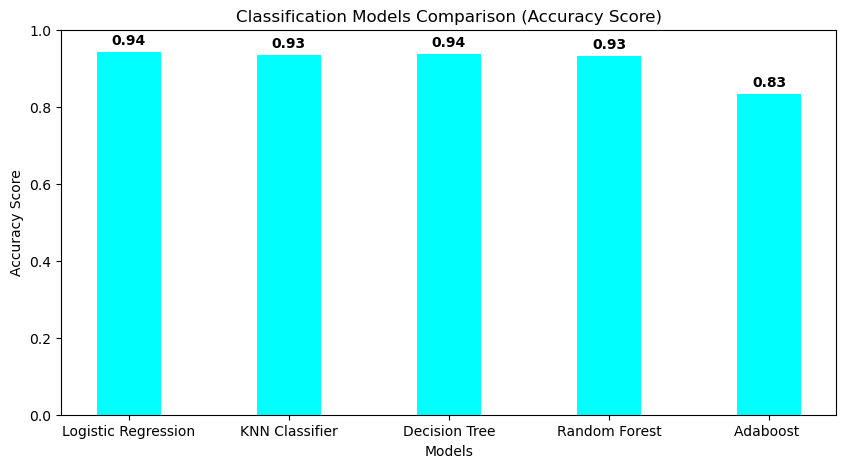

In [545]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'KNN Classifier', 'Decision Tree', 'Random Forest', 'Adaboost ']

# Predicted values from each model 
y_pred_test_lr = LR.predict(x_test_nm)
y_pred_knn = knn.predict(x_test_nm_scaled)
y_pred_test_DT = dt_model.predict(x_test_nm)
y_pred_test_rf = rf.predict(x_test_nm)
y_pred_test_ADAB = ADAB.predict(x_test_nm)

# Calculate R2 scores
accuracy_scores = [
    accuracy_score(y_test_nm, y_pred_test_lr),
    accuracy_score(y_test_nm, y_pred_knn),
    accuracy_score(y_test_nm, y_pred_test_DT),
    accuracy_score(y_test_nm, y_pred_test_rf),
    accuracy_score(y_test_nm, y_pred_test_ADAB)
]

# Plot
plt.figure(figsize=(10,5))
plt.bar(models, accuracy_scores, color='cyan', width=0.4)
# Annotate accuracy score values on bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Classification Models Comparison (Accuracy Score)')
plt.ylim(0, 1)  # Optional: to make chart scale uniform
plt.show()


Logistic Regression and Decision Tree Classifier model gives highest acuracy for this dataset.

## Thank you!